# Forest Cover Type Classifier - Kaggle

The goal of this Kaggle project is to determine the type of forest given the training data. In this notebook we will review the training data, feature engineer useful features, and use a grid search to find the optimal parameters for our classifier.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, Perceptron
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier, BernoulliRBM, MLPRegressor
import sklearn.metrics as sm
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

First, lets read the data in and see what features are available

In [166]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head(20)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [167]:
test_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.00000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000
mean,298066.500000,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,1992.826227,0.454502,0.051927,0.436506,0.057066,0.004729,0.012197,0.006823,0.020416,0.002531,0.010470,0.000186,0.000315,0.002009,0.053883,0.021213,0.052561,0.029962,0.000760,0.000005,0.004826,0.004966,0.003250,0.007024,0.016116,0.001453,0.058364,0.100717,0.037147,0.000836,0.00448,0.001893,0.001656,0.201374,0.052033,0.044768,0.091588,0.078704,0.002808,0.003161,0.000193,0.000467,0.026233,0.023236,0.014651
std,163359.093603,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,1327.396895,0.497926,0.221880,0.495953,0.231968,0.068604,0.109763,0.082318,0.141417,0.050241,0.101787,0.013620,0.017733,0.044779,0.225787,0.144092,0.223156,0.170481,0.027555,0.002302,0.069302,0.070292,0.056914,0.083516,0.125922,0.038085,0.234432,0.300954,0.189121,0.028899,0.06678,0.043463,0.040658,0.401027,0.222094,0.206795,0.288444,0.269277,0.052916,0.056137,0.013877,0.021594,0.159827,0.150652,0.120152
min,15121.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156593.750000,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,1034.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,298066.500000,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,1723.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000

# Exploratory Data Analysis

Here I want to get an idea of what features play the most prominent role. I will look at each forest type and see in the type of soil plays a role.

In [168]:
spruce = train_data[train_data['Cover_Type'] == 1]
lp_pine = train_data[train_data['Cover_Type'] == 2]
p_pine = train_data[train_data['Cover_Type'] == 3]
cottonwood = train_data[train_data['Cover_Type'] == 4]
aspen = train_data[train_data['Cover_Type'] == 5]
d_fir = train_data[train_data['Cover_Type'] == 6]
krummholz = train_data[train_data['Cover_Type'] == 7]

Text(0.5,1,'Spruce Soil Types')

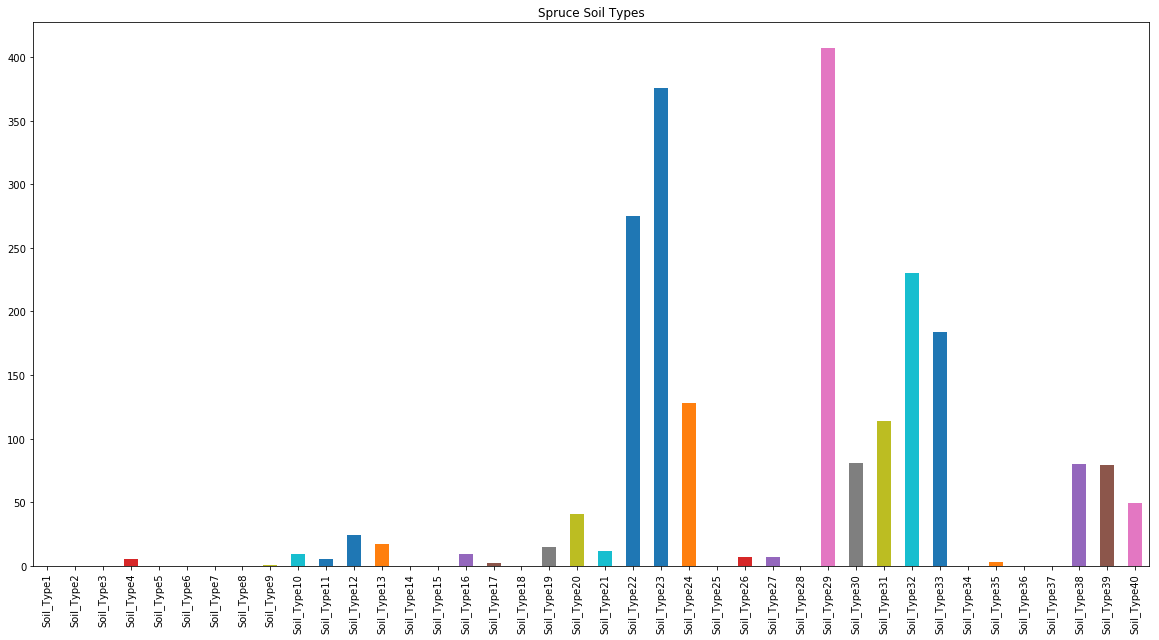

In [169]:
plt.figure(figsize=(20,10))
spruce[spruce.columns[15:55]].sum().plot.bar()
plt.title('Spruce Soil Types')

Text(0.5,1,'Lodgepole Pine Soil Types')

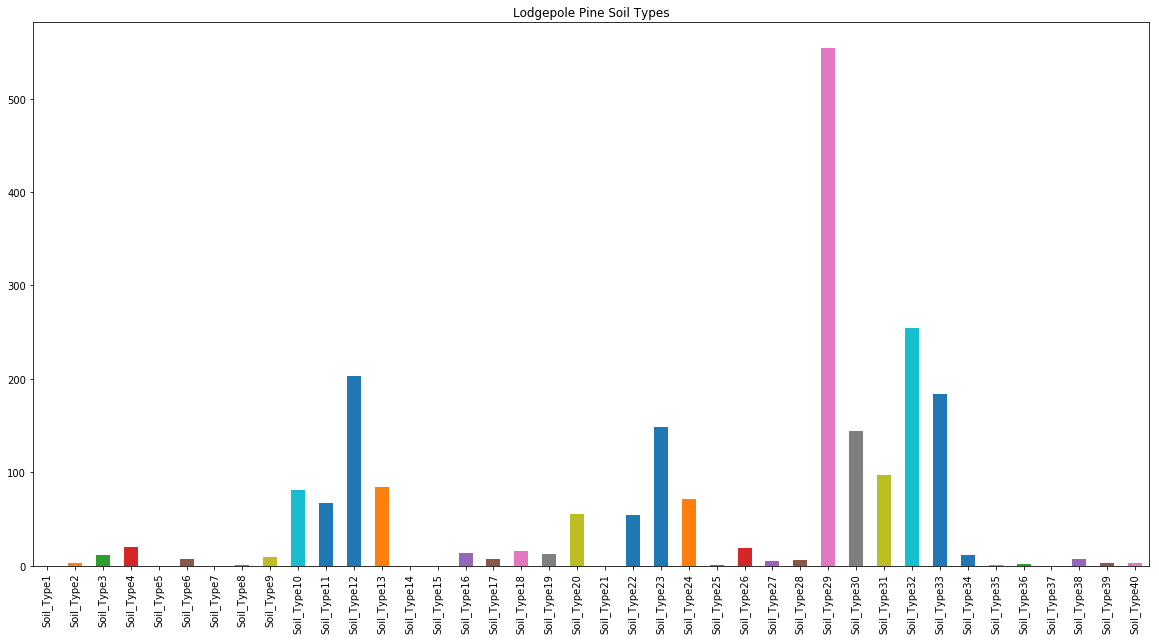

In [170]:
plt.figure(figsize=(20,10))
lp_pine[lp_pine.columns[15:55]].sum().plot.bar()
plt.title('Lodgepole Pine Soil Types')

Text(0.5,1,'Ponderosa Pine Soil Types')

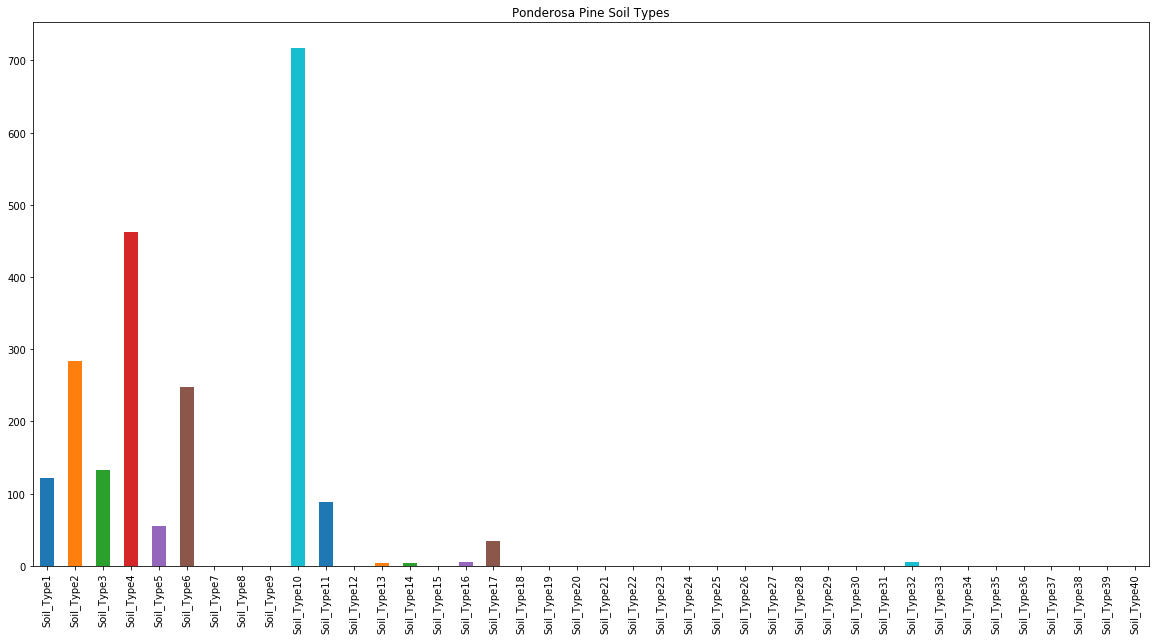

In [171]:
plt.figure(figsize=(20,10))
p_pine[p_pine.columns[15:55]].sum().plot.bar()
plt.title('Ponderosa Pine Soil Types')

Text(0.5,1,'Cottonwood Soil Types')

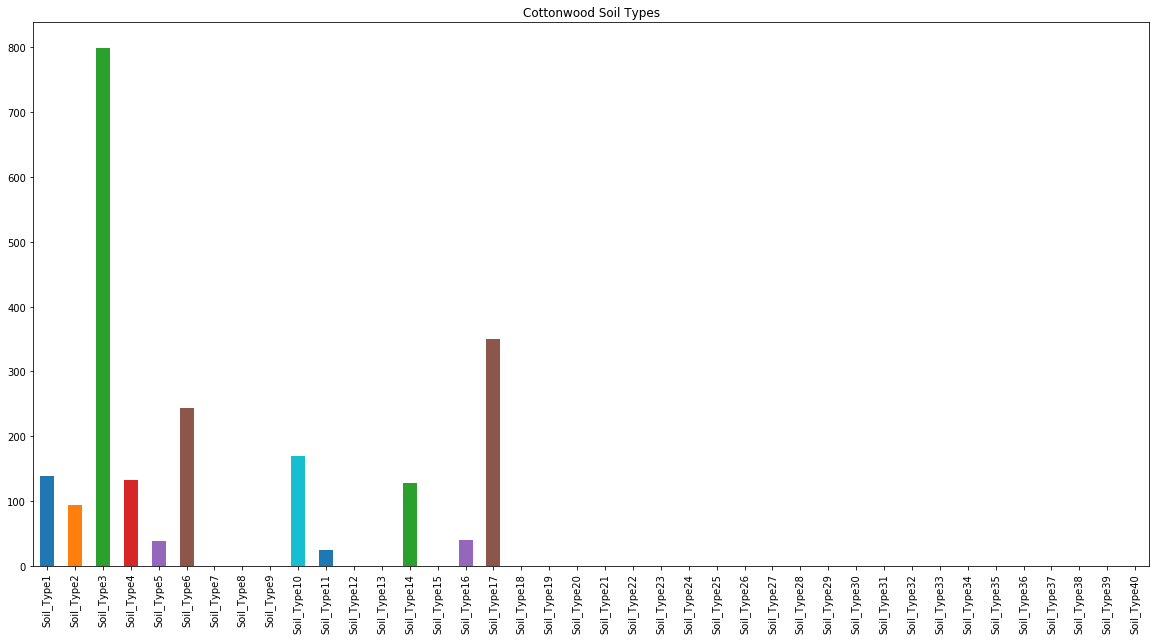

In [172]:
plt.figure(figsize=(20,10))
cottonwood[cottonwood.columns[15:55]].sum().plot.bar()
plt.title('Cottonwood Soil Types')

Text(0.5,1,'Aspen Soil Types')

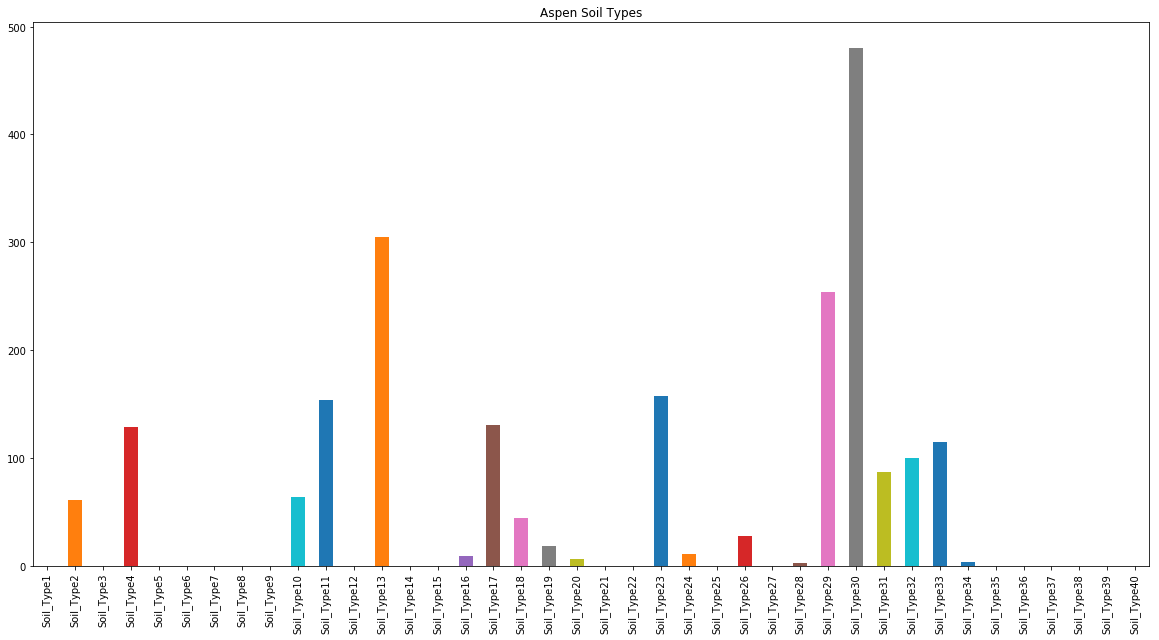

In [173]:
plt.figure(figsize=(20,10))
aspen[aspen.columns[15:55]].sum().plot.bar()
plt.title('Aspen Soil Types')

Text(0.5,1,'Douglas-Fir Soil Types')

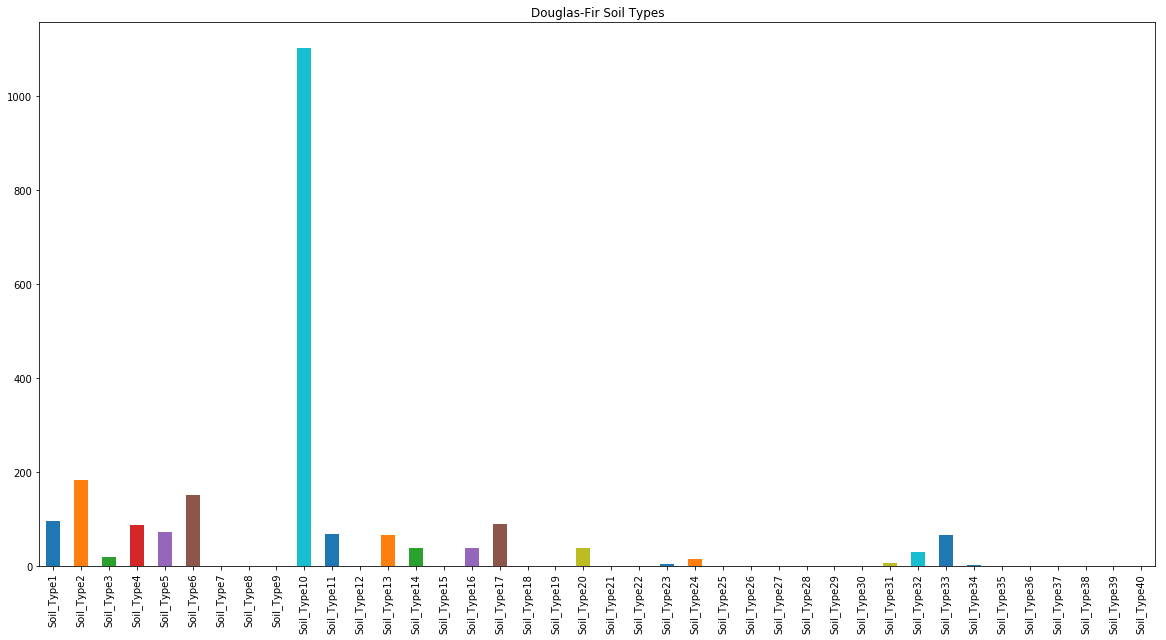

In [174]:
plt.figure(figsize=(20,10))
d_fir[d_fir.columns[15:55]].sum().plot.bar()
plt.title('Douglas-Fir Soil Types')

Text(0.5,1,'Krummholz Soil Types')

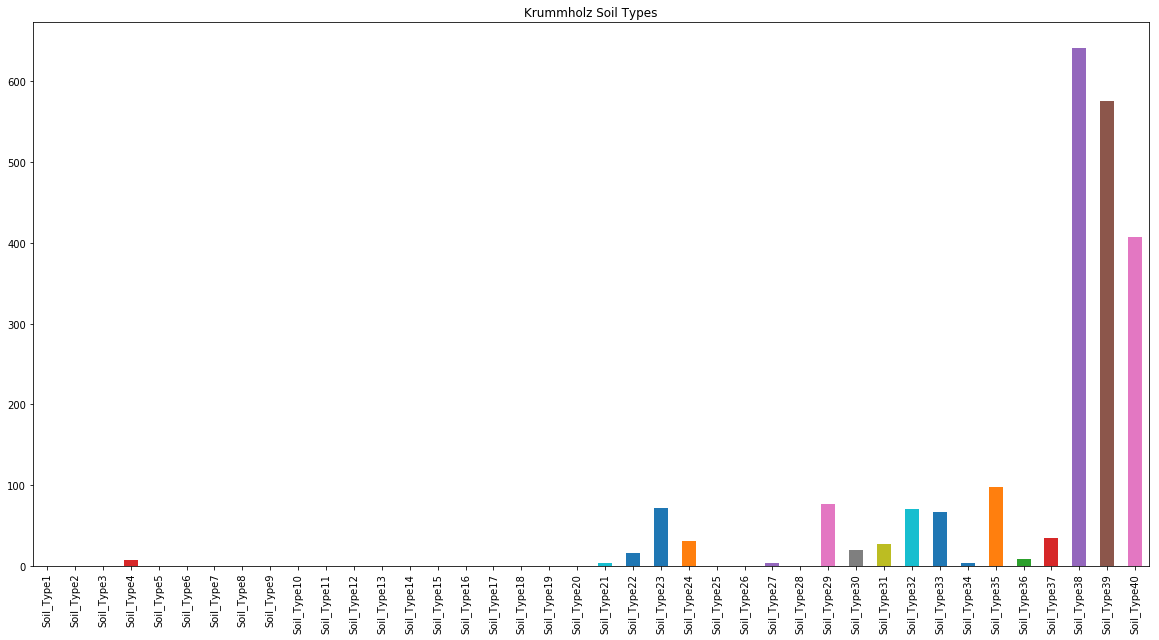

In [175]:
plt.figure(figsize=(20,10))
krummholz[krummholz.columns[15:55]].sum().plot.bar()
plt.title('Krummholz Soil Types')

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64


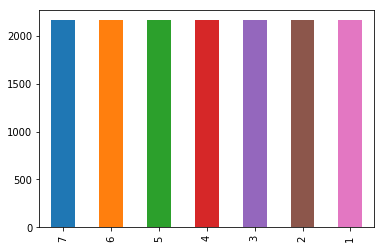

In [176]:
cover_type = pd.Series(train_data.Cover_Type)
cover_type.value_counts().plot(kind = 'bar')

print(cover_type.value_counts())

Here we notice elevation is a very strong feature. Perhaps we can manufacture more features from this.

Text(0,0.5,'Vertical Distance to Hydrology')

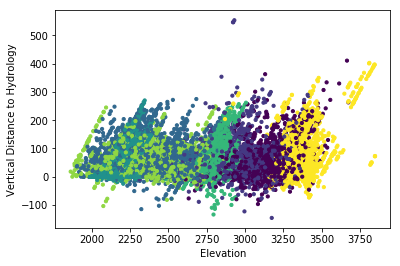

In [177]:
classes = np.array(list(train_data.Cover_Type.values))
plt.scatter(train_data.Elevation, train_data.Vertical_Distance_To_Hydrology, c = classes, s = 10)
plt.xlabel('Elevation')
plt.ylabel('Vertical Distance to Hydrology')

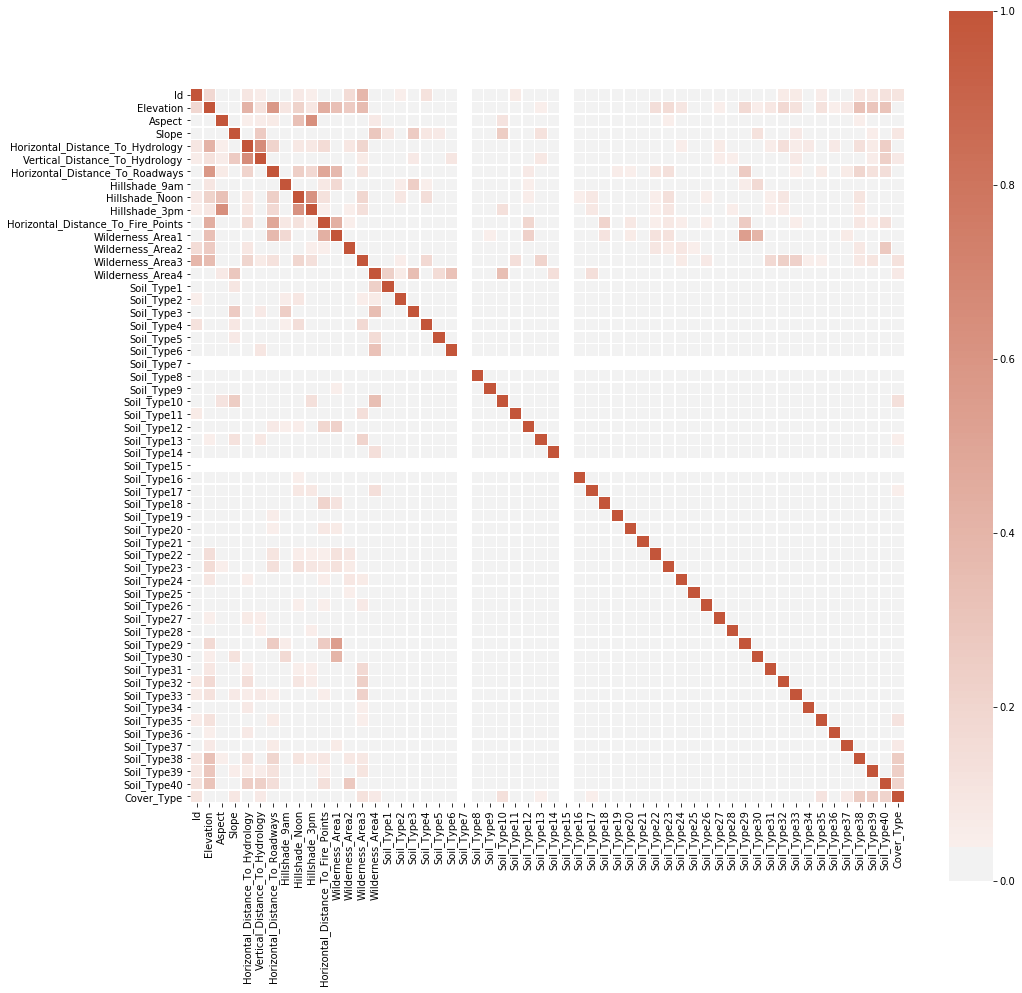

In [178]:
corr = train_data.corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)

plt.figure(figsize = (16,16))
sns.heatmap(corr, cmap=cmap, vmin = 0, vmax=1, center=0,
            square=True, linewidths=.5)

In [179]:
def feature_eng(dataset):
    dataset['Elev_to_Hyrdo_Diff'] = dataset['Elevation'] - dataset['Vertical_Distance_To_Hydrology']
    dataset['Elev_to_Hyrdo_Sum'] = dataset['Elevation'] + dataset['Vertical_Distance_To_Hydrology']
#     dataset['Distance_to_Hyrdro_Roadway_Diff'] = np.abs(dataset['Horizontal_Distance_To_Hydrology']-
#                                                      dataset['Horizontal_Distance_To_Roadways'])
    dataset['Soil']=0   
    for i in range(1,41):
        dataset['Soil'] = dataset['Soil']+i*dataset['Soil_Type'+str(i)]
    
    dataset['Wilderness_Area']=0
    for i in range(1,5):
        dataset['Wilderness_Area']=dataset['Wilderness_Area']+i*dataset['Wilderness_Area'+str(i)]
        
    dataset['Distance_Fire_Roadway_Diff'] = dataset['Horizontal_Distance_To_Fire_Points'] - dataset['Horizontal_Distance_To_Roadways']
    
    dataset['Distance_Fire_Roadway_Sum'] = dataset['Horizontal_Distance_To_Fire_Points'] + dataset['Horizontal_Distance_To_Roadways']
    
    dataset['Shade'] = dataset['Hillshade_9am'] + dataset['Hillshade_Noon'] + dataset['Hillshade_3pm']
    return dataset
    

In [180]:
train_set = feature_eng(train_data)
test_set = feature_eng(test_data)

In [181]:
def get_features():
    return ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
    'Elev_to_Hyrdo_Diff', 'Soil','Wilderness_Area','Distance_Fire_Roadway_Diff', 'Shade', 'Distance_Fire_Roadway_Sum', 'Elev_to_Hyrdo_Sum' ]

# def get_features():
#     return ['Elevation','Aspect', 'Elev_to_Hyrdo_Diff', 'Distance_to_Hyrdro_Roadway_Diff', 'Soil','Wilderness_Area','Distance_Fire_Roadway_Diff', 'Shade']

In [182]:
features = get_features()
X_train = train_set[:][features]
Y_train = train_data['Cover_Type']
X_test = test_set[:][features]

# Feature Ranking

Feature ranking:
1.  Elev_to_Hyrdo_Diff
2.  Soil
3.  Elevation
4.  Elev_to_Hyrdo_Sum
5.  Wilderness_Area
6.  Distance_Fire_Roadway_Sum
7.  Horizontal_Distance_To_Roadways
8.  Horizontal_Distance_To_Hydrology
9.  Distance_Fire_Roadway_Diff
10.  Horizontal_Distance_To_Fire_Points
11.  Hillshade_9am
12.  Aspect
13.  Vertical_Distance_To_Hydrology
14.  Hillshade_3pm
15.  Hillshade_Noon
16.  Shade
17.  Slope


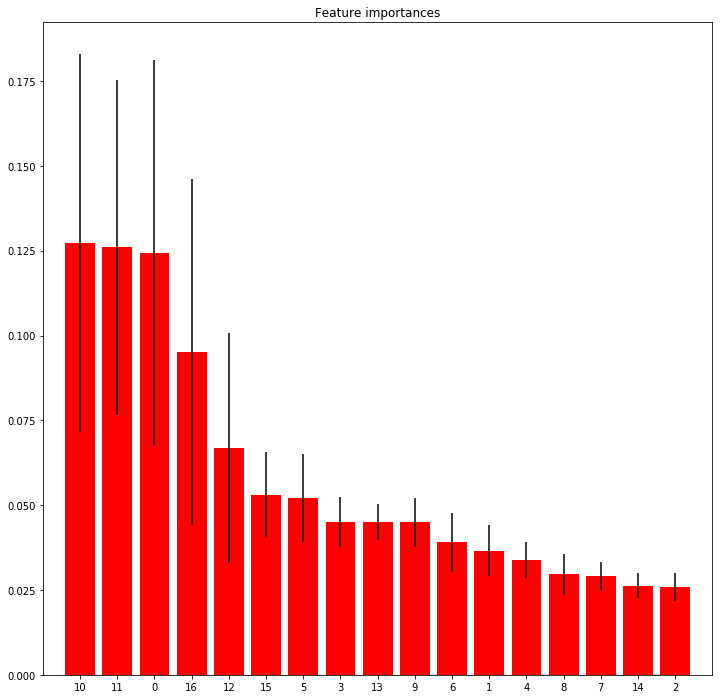

In [183]:
forest = ExtraTreesClassifier(n_estimators = 1000)
forest.fit(X_train, Y_train)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

feature_list = []
for f in range(X_train.shape[1]):
    print("%d. "  % (f + 1), X_train.columns[indices[f]])
    feature_list.append(X_train.columns[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [184]:
features = get_features()
X_train = train_set[:][feature_list[0:11]]
Y_train = train_data['Cover_Type']
X_test = test_set[:][feature_list[0:11]]

In [185]:
feature_matrix_train, feature_matrix_test, target_train, target_test = train_test_split(X_train, 
                                                                                        Y_train, 
                                                                                        test_size=0.25)

for j in np.arange(1,200,20):
    clf = ExtraTreesClassifier(n_estimators = j)
    clf.fit(feature_matrix_train, target_train)
    score = clf.score(feature_matrix_test, target_test)
    print("Accuracy with %d Estimators: %f" % (j, score))

# clf = KMeans(n_clusters = 7)
# clf.fit(feature_matrix_train)
# clf.labels_
# # y = clf.predict(feature_matrix_test)
# sm.accuracy_score(target_test,y)

Accuracy with 1 Estimators: 0.793915
Accuracy with 21 Estimators: 0.884392
Accuracy with 41 Estimators: 0.889418
Accuracy with 61 Estimators: 0.888095
Accuracy with 81 Estimators: 0.889418
Accuracy with 101 Estimators: 0.890476
Accuracy with 121 Estimators: 0.891005
Accuracy with 141 Estimators: 0.891005
Accuracy with 161 Estimators: 0.889153
Accuracy with 181 Estimators: 0.894180


I commented this section out. It was used to obtain the optimal parameters for the ExtraTreesClassifier. 

In [186]:
# Perform on test data

# clf_test = VotingClassifier(estimators=[('clf1', RandomForestClassifier(n_estimators=127)), 
#                                         ('clf2', ExtraTreesClassifier(n_estimators=130))])
# clf_test.fit(X_train, Y_train)
# preds = clf_test.predict(X_test)

# ex_clf = ExtraTreesClassifier()

# params = {
#     "n_estimators" : [500,1000],
#     "bootstrap" : ['True', 'False']
# } 

# ex_grid = GridSearchCV(ex_clf, params)
# start = time.time()
# ex_grid.fit(feature_matrix_train, target_train)

# print("[INFO] randomized search took {:.2f} seconds".format(time.time() - start))

# #acc = grid.score(feature_matrix_test, target_test)
# acc = ex_grid.best_score_
# print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
# print("[INFO] randomized search best parameters: {}".format(ex_grid.best_params_))

Using the optimal parameters, fit the training data and apply to the test data to obtain predictions.

In [187]:
clf_test = ExtraTreesClassifier(n_estimators=1000, bootstrap=False)
clf_test.fit(X_train, Y_train)
preds = clf_test.predict(X_test)

val_id = test_data['Id']
submission = pd.DataFrame({'Id':val_id, 'Cover_Type':preds}, columns=['Id', 'Cover_Type'])
submission.to_csv('attempt_15.csv', index=False)